In [ ]:
import math
import numpy as np
import matplotlib.cbook as cbook
import matplotlib.image as image
import matplotlib.pyplot as plt
import skimage as im
import skimage.feature
import skimage.io as imio
import skimage.transform as imtrans
import cv2
import os 

In [ ]:
os.listdir('./prokudin-gorskii')

['00149v.jpg',
 '00153v.jpg',
 '00398v.jpg',
 '00125v.jpg',
 '01112v.jpg',
 '00351v.jpg']

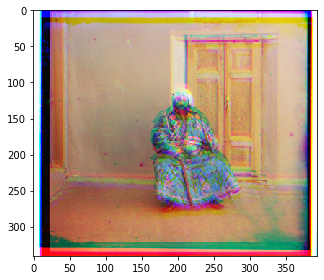

In [ ]:
images = [f for f in os.listdir('.') if os.path.isfile(f)]
images = images[0]

img = imio.imread(images)
img = im.img_as_float(img)
height = np.floor(img.shape[0] / 3.0).astype(np.int)
b = img[:height]
g = img[height: 2 * height]
r = img[2 * height: 3 * height]
rgb = np.dstack((r, g, b))
rgb = 255 * rgb 
img = rgb.astype(np.uint8)
imio.imshow(img)
imio.show()

In [ ]:
def sum_of_square(img1, img2):
    return np.sum(np.sum((img1^img2)**2))

def h_shift(img, n):
    return np.roll(img, n, axis=1)

def v_shift(img, n):
    return np.roll(img, n, axis=0)

def caculate_offset(X, Y):
    offset_x = 0
    offset_y = 0
    min_d = sum_of_square(X, Y)

    for a in range(-1 * 15, 15):
        for b in range(-1 * 15, 15):
            displaced_img = h_shift(v_shift(X, [a,b]))
            new_d = sum_of_square(displaced_img, Y)

            if new_d < min_d:
                offset_x = a
                offset_y = b
                min_d = new_d
    return [offset_x, offset_y]
    
def pyramid(r, g, b, iterations, offsets):
    
    if iterations == 1: factor = 1
    else: factor = int(2 ** iterations)
    print(factor)
    # rescale the images
    r_temp = im.feature.canny((imtrans.rescale(r, 1 / factor),3)
    g_temp = im.feature.canny((imtrans.rescale(g, 1 / factor),3)
    b_temp = im.feature.canny((imtrans.rescale(b, 1 / factor),3)

    aligned_offset = caculate_offset(g_temp, b_temp)
    aligned = align(g_temp, aligned_offset)

    aligned_offset_r = caculate_offset(r_temp, aligned)

    g = h_shift(v_shift(g, [aligned_offset[0] * factor, aligned_offset[1] * factor]))
    r = h_shift(v_shift(r, [aligned_offset_r[0] * factor, aligned_offset_r[1] * factor]))

    offsets[0][0] += aligned_offset[0] * factor
    offsets[0][1] += aligned_offset[1] * factor
    offsets[1][0] += aligned_offset_r[0] * factor
    offsets[1][1] += aligned_offset_r[1] * factor

    if iterations == 1:
      print(offsets)
      return np.dstack((r,g,b))

    return pyramid(r, g, b, iterations-1, offsets)

def combine(image):
    
    imname = image
    img = imio.imread(imname)
    img = im.img_as_float(img)
    height = np.floor(img.shape[0] / 3.0).astype(np.int)
    b = img[:height]
    g = img[height: 2 * height]
    r = img[2 * height: 3 * height]
    iterations = math.floor(math.log2(b.shape[1] / 100))
    offsets = [[0, 0], [0, 0]]
    rgb = pyramid(r, g, b, iterations, offsets) 
    rgb = 255 * rgb 
    img = rgb.astype(np.uint8)
    imio.imshow(img)
    imio.show()

1
[[2, 4], [2, 9]]


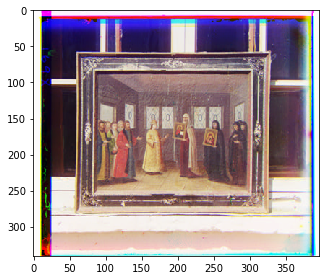

1
[[1, 7], [3, 14]]


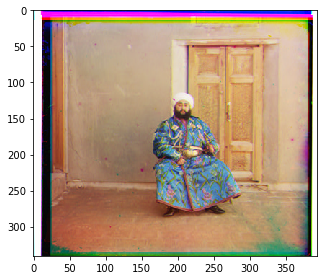

1
[[-1, 6], [0, 12]]


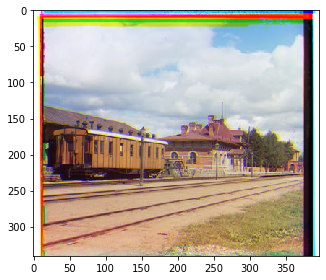

1
[[-1, 5], [-2, 9]]


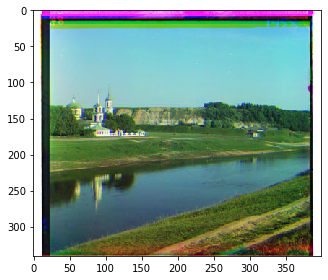

1
[[0, 0], [1, 5]]


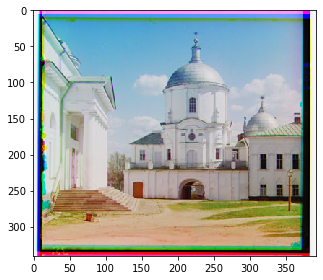

1
[[0, 4], [0, 13]]


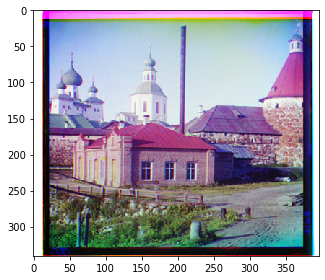

In [ ]:
images = [f for f in os.listdir('.') if os.path.isfile(f)]
for images in images:
    combine(images)

1
[[5, 0], [-5, 0]]


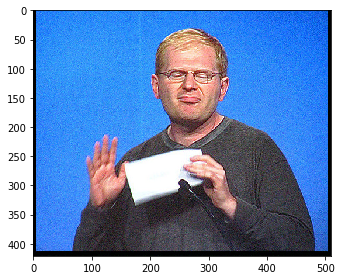

In [ ]:
images = [f for f in os.listdir('.') if os.path.isfile(f)]
for images in images:
  if images == 'efros_tableau.jpg':
    combine(images)

1
[[2, 4], [2, 9]]


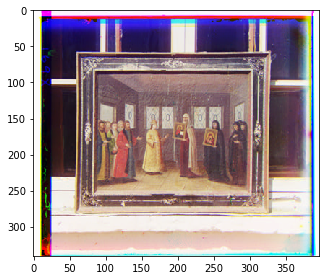

1
[[1, 7], [3, 14]]


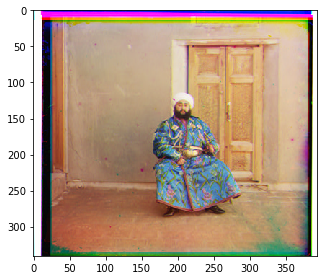

1
[[-1, 6], [0, 12]]


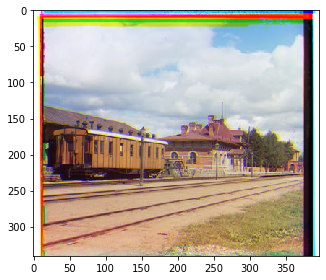

4
1
[[-1, 8], [-2, 12]]


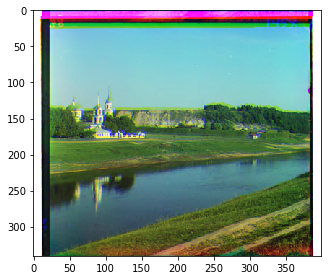

4
1
[[5, 0], [-5, 0]]


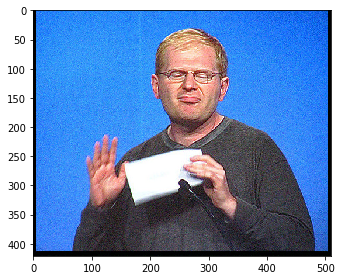

16
8
4
1
[[5, 2], [-1, 2]]


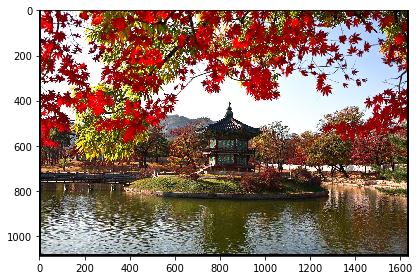

1
[[0, 0], [1, 5]]


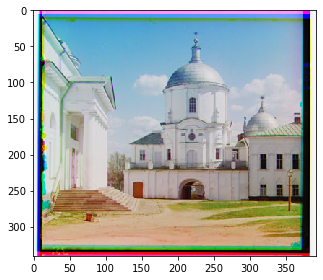

16
8
4
1
[[10, -9], [-12, -8]]


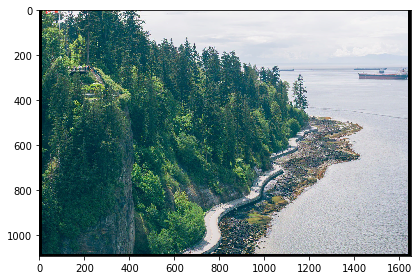

1
[[0, 4], [0, 13]]


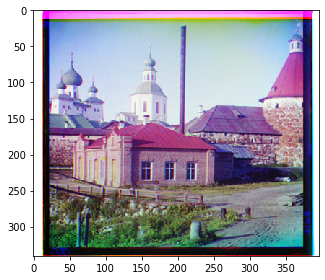

In [ ]:
import os
images = [f for f in os.listdir('.') if os.path.isfile(f)]
for images in images:
    combine(images)